<a href="https://colab.research.google.com/github/arvian354/Portofolio/blob/main/HOTWHEELS_FINAL_PROJECT1_(Skema_1)_standarisasi_dan_outlier_direplace_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **FINAL PROJECT : Machine Learning Of Car Insurance Claim**

## **ML Preperation**

- Import Package
- Dataset (Import, Describe, Info)
- Pre-Cleansing (Re-Formating & Cleansing Preperation)
- Split Feature Category & Numeric

### **Import Package**

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import stats

### **Dataset** (Import, Describe, & Info)

In [ ]:
data = pd.read_csv('file(3).csv')
data.sample(5)

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
4950,336019495,0,52.0,0,14.0,"$62,804",No,"$225,810",Yes,M,Bachelors,z_Blue Collar,26,Commercial,"$15,510",6,Minivan,yes,$0,0,No,1,$0,13.0,0
2496,193388454,0,28.0,3,13.0,"$98,485",No,"$284,911",Yes,M,Bachelors,z_Blue Collar,71,Commercial,"$22,490",1,Van,yes,$0,0,No,2,$0,NaN,0
5048,698634293,1,44.0,3,15.0,"$55,996",No,"$220,628",Yes,z_F,z_High School,z_Blue Collar,33,Commercial,"$22,280",1,z_SUV,no,$0,0,No,0,$0,1.0,0
6044,596450666,0,58.0,0,NaN,"$73,463",No,"$229,325",Yes,M,Masters,Lawyer,34,Private,"$20,710",6,Van,yes,"$11,061",2,No,2,"$3,872",18.0,1
7800,933334494,0,44.0,0,12.0,"$31,526",No,"$139,414",Yes,z_F,z_High School,Clerical,27,Private,"$10,960",6,Sports Car,no,$0,0,No,0,$0,1.0,0


In [ ]:
data.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

### **Pre-Cleansing**

### Re-Format Value (Cleansing)

In [ ]:
data['INCOME'] = data['INCOME'].str.replace('$' , '')
data['INCOME'] = data['INCOME'].str.replace(',' , '')
data['BLUEBOOK'] = data['BLUEBOOK'].str.replace('$' , '')
data['BLUEBOOK'] = data['BLUEBOOK'].str.replace(',' , '')
data['OLDCLAIM'] = data['OLDCLAIM'].str.replace('$' , '')
data['OLDCLAIM'] = data['OLDCLAIM'].str.replace(',' , '')
data['CLM_AMT'] = data['CLM_AMT'].str.replace('$' , '')
data['CLM_AMT'] = data['CLM_AMT'].str.replace(',' , '')
data['HOME_VAL'] = data['HOME_VAL'].str.replace('$' , '')
data['HOME_VAL'] = data['HOME_VAL'].str.replace(',' , '')
data['MSTATUS'] = data['MSTATUS'].str.replace('z_' , '')
data['GENDER'] = data['GENDER'].str.replace('z_' , '')
data['CAR_TYPE'] = data['CAR_TYPE'].str.replace('z_' , '')
data['EDUCATION'] = data['EDUCATION'].str.replace('z_' , '')
data['EDUCATION'] = data['EDUCATION'].str.replace('<' , '')
data['OCCUPATION'] = data['OCCUPATION'].str.replace('z_' , '')

In [ ]:
data.sample(3)

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
9237,185797662,0,42.0,0,NaN,107562,No,281386,Yes,F,Bachelors,Manager,36,Private,5700,7,SUV,no,971,2,No,4,0,15.0,0
8426,398404901,0,29.0,3,NaN,15958,Yes,111962,No,M,High School,Clerical,30,Private,6000,3,Pickup,yes,0,0,No,4,1541,1.0,1
9369,996157117,0,41.0,0,13.0,72146,No,NaN,Yes,F,High School,Blue Collar,38,Commercial,17900,6,Pickup,no,3736,2,No,0,0,6.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   object 
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   object 
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  object 
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  object 
 19  CLM_FREQ    10302 non-nul

In [ ]:
data[['INCOME', 'HOME_VAL', 'CLM_AMT','BLUEBOOK', 'OLDCLAIM']] = data[['INCOME', 'HOME_VAL', 'CLM_AMT','BLUEBOOK', 'OLDCLAIM']].apply(pd.to_numeric)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   AGE         10295 non-null  float64
 3   HOMEKIDS    10302 non-null  int64  
 4   YOJ         9754 non-null   float64
 5   INCOME      9732 non-null   float64
 6   PARENT1     10302 non-null  object 
 7   HOME_VAL    9727 non-null   float64
 8   MSTATUS     10302 non-null  object 
 9   GENDER      10302 non-null  object 
 10  EDUCATION   10302 non-null  object 
 11  OCCUPATION  9637 non-null   object 
 12  TRAVTIME    10302 non-null  int64  
 13  CAR_USE     10302 non-null  object 
 14  BLUEBOOK    10302 non-null  int64  
 15  TIF         10302 non-null  int64  
 16  CAR_TYPE    10302 non-null  object 
 17  RED_CAR     10302 non-null  object 
 18  OLDCLAIM    10302 non-null  int64  
 19  CLM_FREQ    10302 non-nul

#### Cleansing Preparation

In [ ]:
data.isna().sum()

ID              0
KIDSDRIV        0
AGE             7
HOMEKIDS        0
YOJ           548
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE       639
CLAIM_FLAG      0
dtype: int64

In [ ]:
data.duplicated().sum()

1

Ditemukan 1 row duplikat pada dataset.

In [ ]:
data.duplicated(subset='ID').sum()

1549

Ditemukan 1549 value duplikat pada feature `ID`.

### **Feature Category & Numeric**

In [ ]:
nums = ['KIDSDRIV','AGE','HOMEKIDS','YOJ','INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ','MVR_PTS','CLM_AMT','CAR_AGE','CLAIM_FLAG']
cats = ['PARENT1','MSTATUS','GENDER','EDUCATION','OCCUPATION','CAR_USE','CAR_TYPE','RED_CAR','REVOKED']

In [ ]:
data[nums].describe()

,KIDSDRIV,AGE,HOMEKIDS,YOJ,INCOME,HOME_VAL,TRAVTIME,BLUEBOOK,TIF,OLDCLAIM,CLM_FREQ,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG
count,10302.000000,10295.000000,10302.000000,9754.000000,9732.000000,9727.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,0.169288,44.837397,0.720443,10.474062,61572.073263,154523.018608,33.416424,15659.923316,5.329159,4033.977868,0.800718,1.710153,1511.266453,8.298148,0.266550
std,0.506512,8.606445,1.116323,4.108943,47457.202749,129188.439405,15.869687,8428.765264,4.110795,8733.143119,1.154079,2.159015,4725.249896,5.714450,0.442177
min,0.000000,16.000000,0.000000,0.000000,0.000000,0.000000,5.000000,1500.000000,1.000000,0.000000,0.000000,0.000000,0.000000,-3.000000,0.000000
25%,0.000000,39.000000,0.000000,9.000000,27584.000000,0.000000,22.000000,9200.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.000000,45.000000,0.000000,11.000000,53529.000000,160661.000000,33.000000,14400.000000,4.000000,0.000000,0.000000,1.000000,0.000000,8.000000,0.000000
75%,0.000000,51.000000,1.000000,13.000000,86166.000000,238256.000000,44.000000,20890.000000,7.000000,4647.500000,2.000000,3.000000,1144.750000,12.000000,1.000000
max,4.000000,81.000000,5.000000,23.000000,367030.000000,885282.000000,142.000000,69740.000000,25.000000,57037.000000,5.000000,13.000000,123247.000000,28.000000,1.000000


In [ ]:
data[cats].describe()

,PARENT1,MSTATUS,GENDER,EDUCATION,OCCUPATION,CAR_USE,CAR_TYPE,RED_CAR,REVOKED
count,10302,10302,10302,10302,9637,10302,10302,10302,10302
unique,2,2,2,4,8,2,6,2,2
top,No,Yes,F,High School,Blue Collar,Private,SUV,no,No
freq,8959,6188,5545,4467,2288,6513,2883,7326,9041


## **Data Pre-Processing**

- Duplicate Data
- Normalization / Standardization
- Feature Encoding
- Missing Data
- Outliers
- Class Imbalance

### Duplicate Data

In [ ]:
print(data.duplicated().sum())
print(data.duplicated(subset='ID').sum())

1
1549


In [ ]:
print(data.duplicated().sum())
data_ad = data.drop_duplicates()
print(data_ad.duplicated().sum())

1
0


###Normalization / Standardization

menggunakan standarisasi, ( NB: abaikan perubahan nama kolom)

In [ ]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler, StandardScaler
data_ad['KIDSDRIV'] = StandardScaler().fit_transform(data_ad['KIDSDRIV'].values.reshape(len(data_ad), 1))
data_ad['AGE_std'] = StandardScaler().fit_transform(data_ad['AGE'].values.reshape(len(data_ad), 1))
data_ad['HOMEKIDS_norm'] = StandardScaler().fit_transform(data_ad['HOMEKIDS'].values.reshape(len(data_ad), 1))
data_ad['YOJ_std'] = StandardScaler().fit_transform(data_ad['YOJ'].values.reshape(len(data_ad), 1))
data_ad['INCOME_std'] = StandardScaler().fit_transform(data_ad['INCOME'].values.reshape(len(data_ad), 1))
data_ad['HOME_VAL_norm'] = StandardScaler().fit_transform(data_ad['HOME_VAL'].values.reshape(len(data_ad), 1))
data_ad['TRAVTIME_std'] = StandardScaler().fit_transform(data_ad['TRAVTIME'].values.reshape(len(data_ad), 1))
data_ad['BLUEBOOK_std'] = StandardScaler().fit_transform(data_ad['BLUEBOOK'].values.reshape(len(data_ad), 1))
data_ad['TIF_norm'] = StandardScaler().fit_transform(data_ad['TIF'].values.reshape(len(data_ad), 1))
data_ad['OLDCLAIM_norm'] = StandardScaler().fit_transform(data_ad['OLDCLAIM'].values.reshape(len(data_ad), 1))
data_ad['CLM_FREQ_norm'] = StandardScaler().fit_transform(data_ad['CLM_FREQ'].values.reshape(len(data_ad), 1))
data_ad['MVR_PTS_norm'] = StandardScaler().fit_transform(data_ad['MVR_PTS'].values.reshape(len(data_ad), 1))
data_ad['CLM_AMT_norm'] = StandardScaler().fit_transform(data_ad['CLM_AMT'].values.reshape(len(data_ad), 1))
data_ad['CAR_AGE_std'] = StandardScaler().fit_transform(data_ad['CAR_AGE'].values.reshape(len(data_ad), 1))



norm = ['AGE','YOJ','INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','TIF','OLDCLAIM','CAR_AGE']
data_ans = data_ad.drop(columns=norm)

In [ ]:
norm = ['AGE','HOMEKIDS', 'YOJ','INCOME','HOME_VAL','TRAVTIME','BLUEBOOK','TIF','OLDCLAIM','CLM_FREQ', 'MVR_PTS', 'CLM_AMT','CAR_AGE']
data_ans = data_ad.drop(columns=norm)

In [ ]:
data_ans.describe()

,ID,KIDSDRIV,CLAIM_FLAG,AGE_std,HOMEKIDS_norm,YOJ_std,INCOME_std,HOME_VAL_norm,TRAVTIME_std,BLUEBOOK_std,TIF_norm,OLDCLAIM_norm,CLM_FREQ_norm,MVR_PTS_norm,CLM_AMT_norm,CAR_AGE_std
count,1.030100e+04,1.030100e+04,10301.000000,1.029400e+04,1.030100e+04,9.753000e+03,9.731000e+03,9.726000e+03,1.030100e+04,1.030100e+04,1.030100e+04,1.030100e+04,1.030100e+04,1.030100e+04,1.030100e+04,9.662000e+03
mean,4.956841e+08,-4.333437e-16,0.266576,2.766390e-16,-4.131569e-16,-2.507934e-16,-2.618397e-18,3.682822e-16,-1.363610e-16,6.676858e-17,-3.030884e-16,4.071536e-16,-3.112418e-16,6.188623e-17,2.786066e-17,-1.950374e-16
std,2.864735e+08,1.000049e+00,0.442190,1.000049e+00,1.000049e+00,1.000051e+00,1.000051e+00,1.000051e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000049e+00,1.000052e+00
min,6.317500e+04,-3.342567e-01,0.000000,-3.350815e+00,-6.454467e-01,-2.549097e+00,-1.297384e+00,-1.196064e+00,-1.790644e+00,-1.679964e+00,-1.053279e+00,-4.619656e-01,-6.938997e-01,-7.921999e-01,-3.198605e-01,-1.977418e+00
25%,2.442710e+08,-3.342567e-01,0.000000,-6.783398e-01,-6.454467e-01,-3.586703e-01,-7.161527e-01,-1.196064e+00,-7.194153e-01,-7.664254e-01,-1.053279e+00,-4.619656e-01,-6.938997e-01,-7.921999e-01,-3.198605e-01,-1.277379e+00
50%,4.970541e+08,-3.342567e-01,0.000000,1.882772e-02,-6.454467e-01,1.280912e-01,-1.694794e-01,4.733715e-02,-2.626733e-02,-1.494900e-01,-3.234536e-01,-4.619656e-01,-6.938997e-01,-3.290116e-01,-3.198605e-01,-5.231092e-02
75%,7.395301e+08,-3.342567e-01,1.000000,7.159953e-01,2.503693e-01,6.148527e-01,5.177554e-01,6.481974e-01,6.668806e-01,6.204927e-01,4.063716e-01,7.026529e-02,1.039125e+00,5.973650e-01,-7.754404e-02,6.477280e-01
max,9.999264e+08,7.562940e+00,1.000000,4.201833e+00,3.833633e+00,3.048660e+00,6.436706e+00,5.656749e+00,6.842199e+00,6.416126e+00,4.785323e+00,6.069199e+00,3.638662e+00,5.229248e+00,2.576291e+01,3.447884e+00


### Feature Encoding

In [ ]:
data_ans['OCCUPATION'] = data_ans['OCCUPATION'].fillna('Blue Collar')

In [ ]:
for catt in cats:
    onehots = pd.get_dummies(data_ans[catt], prefix=catt)
    data_ans = data_ans.join(onehots)

In [ ]:
data_afe = data_ans.copy()

In [ ]:
data_afe = data_afe.drop(['PARENT1', 'PARENT1_No','MSTATUS','MSTATUS_No','GENDER',
                  'GENDER_F','RED_CAR','RED_CAR_no','REVOKED','REVOKED_No',
                  'CAR_TYPE', 'CAR_USE_Commercial','CAR_USE','EDUCATION',
                  'OCCUPATION'], axis=1)
data_afe.sample(3)

,ID,KIDSDRIV,CLAIM_FLAG,AGE_std,HOMEKIDS_norm,YOJ_std,INCOME_std,HOME_VAL_norm,TRAVTIME_std,BLUEBOOK_std,TIF_norm,OLDCLAIM_norm,CLM_FREQ_norm,MVR_PTS_norm,CLM_AMT_norm,CAR_AGE_std,PARENT1_Yes,MSTATUS_Yes,GENDER_M,EDUCATION_Bachelors,EDUCATION_High School,EDUCATION_Masters,EDUCATION_PhD,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,RED_CAR_yes,REVOKED_Yes
10261,775571725,-0.334257,0,1.296968,1.146185,1.831757,1.071541,1.241383,0.099760,3.530767,0.163097,-0.461966,-0.6939,-0.792200,-0.31986,-0.227321,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0
3858,14251930,1.640043,0,-0.678340,1.146185,0.858234,-0.527579,-0.137885,-0.089281,-1.246923,-1.053279,-0.461966,-0.6939,1.060553,-0.31986,NaN,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
7027,93202709,-0.334257,0,-1.259313,1.146185,-0.602051,NaN,-0.310335,-1.097496,-0.907609,-1.053279,-0.461966,-0.6939,-0.792200,-0.31986,-1.277379,1,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0


### Missing Data

In [ ]:
data_afe.columns[data_afe.isna().any()]

Index(['AGE_std', 'YOJ_std', 'INCOME_std', 'HOME_VAL_norm', 'CAR_AGE_std'], dtype='object')

In [ ]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
data_afe = pd.DataFrame(imputer.fit_transform(data_afe),columns = data_afe.columns)

In [ ]:
data_afe.isna().any()

ID                         False
KIDSDRIV                   False
CLAIM_FLAG                 False
AGE_std                    False
HOMEKIDS_norm              False
YOJ_std                    False
INCOME_std                 False
HOME_VAL_norm              False
TRAVTIME_std               False
BLUEBOOK_std               False
TIF_norm                   False
OLDCLAIM_norm              False
CLM_FREQ_norm              False
MVR_PTS_norm               False
CLM_AMT_norm               False
CAR_AGE_std                False
PARENT1_Yes                False
MSTATUS_Yes                False
GENDER_M                   False
EDUCATION_Bachelors        False
EDUCATION_High School      False
EDUCATION_Masters          False
EDUCATION_PhD              False
OCCUPATION_Blue Collar     False
OCCUPATION_Clerical        False
OCCUPATION_Doctor          False
OCCUPATION_Home Maker      False
OCCUPATION_Lawyer          False
OCCUPATION_Manager         False
OCCUPATION_Professional    False
OCCUPATION

In [ ]:
data_amd = data_afe.copy()

### Outlier

In [ ]:
out =['KIDSDRIV','HOMEKIDS_norm', 'CLM_FREQ_norm', 'MVR_PTS_norm', 'AGE_std' , 'YOJ_std','INCOME_std', 'HOME_VAL_norm','TRAVTIME_std','BLUEBOOK_std','TIF_norm','TIF_norm', 'OLDCLAIM_norm', 'CLM_AMT_norm','CAR_AGE_std']

In [ ]:
def replace_outlier(val, low_limit, high_limit):
  if val <= low_limit:
    return low_limit
  elif val >= high_limit:
    return high_limit
  return val

In [ ]:
for col in out:
  Q1 = data_amd[col].quantile(0.25)
  Q3 = data_amd[col].quantile(0.75)
  IQR = Q3 - Q1
  low_limit = Q1 - (IQR * 1.5)
  high_limit = Q3 + (IQR * 1.5)
  data_amd[col] = data_amd[col].map(lambda x: replace_outlier(x, low_limit, high_limit))

In [ ]:
data_aout = data_amd.copy()
len(data_aout)

10301

In [ ]:
data_aout.describe()

,ID,KIDSDRIV,CLAIM_FLAG,AGE_std,HOMEKIDS_norm,YOJ_std,INCOME_std,HOME_VAL_norm,TRAVTIME_std,BLUEBOOK_std,TIF_norm,OLDCLAIM_norm,CLM_FREQ_norm,MVR_PTS_norm,CLM_AMT_norm,CAR_AGE_std,PARENT1_Yes,MSTATUS_Yes,GENDER_M,EDUCATION_Bachelors,EDUCATION_High School,EDUCATION_Masters,EDUCATION_PhD,OCCUPATION_Blue Collar,OCCUPATION_Clerical,OCCUPATION_Doctor,OCCUPATION_Home Maker,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,CAR_USE_Private,CAR_TYPE_Minivan,CAR_TYPE_Panel Truck,CAR_TYPE_Pickup,CAR_TYPE_SUV,CAR_TYPE_Sports Car,CAR_TYPE_Van,RED_CAR_yes,REVOKED_Yes
count,1.030100e+04,1.030100e+04,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,1.030100e+04,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000,10301.000000
mean,4.956841e+08,-3.342567e-01,0.266576,-0.000123,-0.067354,0.056379,-0.023166,-0.000535,-0.005028,-0.006173,-0.008715,-0.172772,-3.112418e-16,-0.011129,-0.175607,0.000124,0.130376,0.600621,0.461703,0.273954,0.433647,0.201728,0.090671,0.286671,0.154354,0.031162,0.081837,0.100087,0.122027,0.136589,0.087273,0.632172,0.261431,0.082807,0.172022,0.279876,0.114455,0.089409,0.288807,0.122415
std,2.864735e+08,3.897072e-14,0.442190,0.995296,0.848605,0.838558,0.906028,0.974999,0.982384,0.979270,0.973599,0.441542,1.000049e+00,0.964157,0.248499,0.975948,0.336733,0.489794,0.498555,0.446007,0.495602,0.401310,0.287154,0.452229,0.361305,0.173764,0.274129,0.300131,0.327333,0.343429,0.282249,0.482238,0.439435,0.275604,0.377418,0.448960,0.318378,0.285347,0.453230,0.327781
min,6.317500e+04,-3.342567e-01,0.000000,-2.769842,-0.645447,-1.818955,-1.297384,-1.196064,-1.790644,-1.679964,-1.053279,-0.461966,-6.938997e-01,-0.792200,-0.319860,-1.977418,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.442710e+08,-3.342567e-01,0.000000,-0.678340,-0.645447,-0.358670,-0.690993,-1.196064,-0.719415,-0.766425,-1.053279,-0.461966,-6.938997e-01,-0.792200,-0.319860,-0.927360,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.970541e+08,-3.342567e-01,0.000000,0.018828,-0.645447,0.128091,-0.155340,0.041431,-0.026267,-0.149490,-0.323454,-0.461966,-6.938997e-01,-0.329012,-0.319860,-0.052311,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.395301e+08,-3.342567e-01,1.000000,0.715995,0.250369,0.614853,0.496420,0.626428,0.666881,0.620493,0.406372,0.070265,1.039125e+00,0.597365,-0.077544,0.647728,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000
max,9.999264e+08,-3.342567e-01,1.000000,2.807498,1.594093,2.075137,2.277539,3.360166,2.746325,2.700870,2.595847,0.868612,3.638662e+00,2.681712,0.285931,3.010359,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


### Split Train Test Data

In [ ]:
X1 = data_aout.drop(columns=['ID', 'CLM_AMT_norm', 'CLAIM_FLAG', 'KIDSDRIV'])
y1 = data_aout['CLAIM_FLAG']

from sklearn.model_selection import train_test_split 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size = 0.3, random_state = 42)

In [ ]:
print(X1_train.shape,X1_test.shape,y1_train.shape,y1_test.shape)

(7210, 36) (3091, 36) (7210,) (3091,)


In [ ]:
from imblearn import under_sampling, over_sampling
X1_under, y1_under = under_sampling.RandomUnderSampler().fit_resample(X1_train, y1_train)
X1_over, y1_over = over_sampling.RandomOverSampler(0.5).fit_resample(X1_train, y1_train)
X1_over_SMOTE, y1_over_SMOTE = over_sampling.SMOTE().fit_resample(X1_train, y1_train)

In [ ]:
print(pd.Series(y1_train).value_counts())
print(pd.Series(y1_under).value_counts())
print(pd.Series(y1_over).value_counts())
print(pd.Series(y1_over_SMOTE).value_counts())

0.0    5264
1.0    1946
Name: CLAIM_FLAG, dtype: int64
1.0    1946
0.0    1946
dtype: int64
0.0    5264
1.0    2632
dtype: int64
1.0    5264
0.0    5264
dtype: int64


In [ ]:
array_X1_train =  X1_train.values
array_X1_test = X1_test.values
array_y1_train = y1_train.values
array_y1_test = y1_test.values

## **Clasification Modeling and Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

def eval_classification(model, pred, xtrain, ytrain, xtest, ytest):
    print("Accuracy (Test Set): %.2f" % accuracy_score(ytest, pred))
    print("Precision (Test Set): %.2f" % precision_score(ytest, pred))
    print("Recall (Test Set): %.2f" % recall_score(ytest, pred))
    print("F1-Score (Test Set): %.2f" % f1_score(ytest, pred))
    
    fpr, tpr, thresholds = roc_curve(ytest, pred, pos_label=1) # pos_label: label yang kita anggap positive
    print("AUC: %.2f" % auc(fpr, tpr))

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X1.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model, hyperparameters):
    for key, value in hyperparameters.items() :
        print('Best '+key+':', model.get_params()[key])

### **1.  K-Nearest Neighbor**

In [ ]:
# Menentukan nilai K
n = 3788
k = (n**0.5)
print(k)

61.54673021371647


#### **Menggunakan data awal**

#####TRAIN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier(n_neighbors=61) # inisiasi object dengan nama knn
knn.fit(X1_train, y1_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

######**Prediction Result (in data test)**

In [ ]:
y1_pred = knn.predict(X1_test)
y1_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(pd.Series(y1_pred).value_counts())

0.0    2939
1.0     152
dtype: int64


######**Evaluation**

In [ ]:
eval_classification(knn, y1_pred, X1_train, X1_test, y1_train, y1_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.70
Recall (Test Set): 0.13
F1-Score (Test Set): 0.22
AUC: 0.56


In [ ]:
print('Train score: ' + str(knn.score(X1_train, y1_train))) #accuracy
print('Test score:' + str(knn.score(X1_test, y1_test))) #accuracy

Train score: 0.7547850208044383
Test score:0.7605952766095115


MODERATE

######**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,90))
p=[1,2,3]

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

# Init model
knn = KNeighborsClassifier()
modelknn = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='f1')

# Fit Model & Evaluasi
modelknn.fit(X1_train, y1_train)
y1_pred = modelknn.predict(X1_test)
eval_classification(modelknn, y1_pred, X1_train, X1_test, y1_train, y1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.52
Recall (Test Set): 0.27
F1-Score (Test Set): 0.36
AUC: 0.59


In [ ]:
print('Best n_neighbors:', modelknn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', modelknn.best_estimator_.get_params()['p'])
print('Best algorithm:', modelknn.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 5
Best p: 2
Best algorithm: kd_tree


In [ ]:
print('Train score: ' + str(modelknn.score(X1_train, y1_train))) #accuracy
print('Test score:' + str(modelknn.score(X1_test, y1_test))) #accuracy

Train score: 1.0
Test score:0.35526315789473684


Underfiting!

#####SMOTE

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier(n_neighbors=61) # inisiasi object dengan nama knn
knn.fit(X1_over_SMOTE, y1_over_SMOTE)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

######**Prediction Result (in data test)**

In [ ]:
y1_pred = knn.predict(X1_test)
y1_pred

array([1., 1., 0., ..., 1., 1., 1.])

In [ ]:
print(pd.Series(y1_pred).value_counts())

0.0    1572
1.0    1519
dtype: int64


######**Evaluation**

In [ ]:
eval_classification(knn, y1_pred, X1_over_SMOTE, X1_test, y1_over_SMOTE, y1_test)

Accuracy (Test Set): 0.64
Precision (Test Set): 0.40
Recall (Test Set): 0.76
F1-Score (Test Set): 0.52
AUC: 0.68


In [ ]:
print('Train score: ' + str(knn.score(X1_over_SMOTE, y1_over_SMOTE))) #accuracy
print('Test score:' + str(knn.score(X1_test, y1_test))) #accuracy

Train score: 0.713620820668693
Test score:0.6418634746036881


UNDERFITING!

######**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,90))
p=[1,2,3]

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

# Init model
knn = KNeighborsClassifier()
modelknn = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='f1')

# Fit Model & Evaluasi
modelknn.fit(X1_over_SMOTE, y1_over_SMOTE)
y1_pred = modelknn.predict(X1_test)
eval_classification(modelknn, y1_pred, X1_over_SMOTE, X1_test, y1_over_SMOTE, y1_test)

Accuracy (Test Set): 0.63
Precision (Test Set): 0.37
Recall (Test Set): 0.61
F1-Score (Test Set): 0.46
AUC: 0.62


In [ ]:
print('Best n_neighbors:', modelknn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', modelknn.best_estimator_.get_params()['p'])
print('Best algorithm:', modelknn.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 5
Best p: 2
Best algorithm: kd_tree


In [ ]:
print('Train score: ' + str(modelknn.score(X1_over_SMOTE, y1_over_SMOTE))) #accuracy
print('Test score:' + str(modelknn.score(X1_test, y1_test))) #accuracy

Train score: 1.0
Test score:0.4601603017444601


UNDERFITING!

#####UNDER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier(n_neighbors=61) # inisiasi object dengan nama knn
knn.fit(X1_under, y1_under)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

######**Prediction Result (in data test)**

In [ ]:
y1_pred = knn.predict(X1_test)
y1_pred

array([1., 1., 1., ..., 0., 1., 1.])

In [ ]:
print(pd.Series(y1_pred).value_counts())

0.0    2057
1.0    1034
dtype: int64


######**Evaluation**

In [ ]:
eval_classification(knn, y1_pred, X1_under, X1_test, y1_under, y1_test)

Accuracy (Test Set): 0.73
Precision (Test Set): 0.48
Recall (Test Set): 0.62
F1-Score (Test Set): 0.54
AUC: 0.69


In [ ]:
print('Train score: ' + str(knn.score(X1_under, y1_under))) #accuracy
print('Test score:' + str(knn.score(X1_test, y1_test))) #accuracy

Train score: 0.6798561151079137
Test score:0.7256551277903591


OVERFITING!

######**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,90))
p=[1,2,3]

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

# Init model
knn = KNeighborsClassifier()
modelknn = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='f1')

# Fit Model & Evaluasi
modelknn.fit(X1_under, y1_under)
y1_pred = modelknn.predict(X1_test)
eval_classification(modelknn, y1_pred, X1_under, X1_test, y1_under, y1_test)

Accuracy (Test Set): 0.72
Precision (Test Set): 0.47
Recall (Test Set): 0.62
F1-Score (Test Set): 0.53
AUC: 0.69


In [ ]:
print('Best n_neighbors:', modelknn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', modelknn.best_estimator_.get_params()['p'])
print('Best algorithm:', modelknn.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 29
Best p: 2
Best algorithm: kd_tree


In [ ]:
print('Train score: ' + str(modelknn.score(X1_under, y1_under))) #accuracy
print('Test score:' + str(modelknn.score(X1_test, y1_test))) #accuracy

Train score: 0.6783657800932272
Test score:0.5333333333333333


UNDERFITING!

#####OVER

In [ ]:
from sklearn.neighbors import KNeighborsClassifier# import knn dari sklearn
knn = KNeighborsClassifier(n_neighbors=61) # inisiasi object dengan nama knn
knn.fit(X1_over, y1_over)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=61, p=2,
                     weights='uniform')

######**Prediction Result (in data test)**

In [ ]:
y1_pred = knn.predict(X1_test)
y1_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(pd.Series(y1_pred).value_counts())

0.0    2750
1.0     341
dtype: int64


######**Evaluation**

In [ ]:
eval_classification(knn, y1_pred, X1_over, X1_test, y1_over, y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.62
Recall (Test Set): 0.27
F1-Score (Test Set): 0.37
AUC: 0.60


In [ ]:
print('Train score: ' + str(knn.score(X1_over, y1_over))) #accuracy
print('Test score:' + str(knn.score(X1_test, y1_test))) #accuracy

Train score: 0.7299898682877406
Test score:0.7680362342284051


UNDERFITING!

######**Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform

# List of hyperparameter
n_neighbors = list(range(1,90))
p=[1,2,3]

algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
weights = ['uniform','distance']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm, weights=weights)

# Init model
knn = KNeighborsClassifier()
modelknn = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=42, scoring='f1')

# Fit Model & Evaluasi
modelknn.fit(X1_over, y1_over)
y1_pred = modelknn.predict(X1_test)
eval_classification(modelknn, y1_pred, X1_over, X1_test, y1_over, y1_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.61
Recall (Test Set): 0.24
F1-Score (Test Set): 0.34
AUC: 0.59


In [ ]:
print('Best n_neighbors:', modelknn.best_estimator_.get_params()['n_neighbors'])
print('Best p:', modelknn.best_estimator_.get_params()['p'])
print('Best algorithm:', modelknn.best_estimator_.get_params()['algorithm'])

Best n_neighbors: 89
Best p: 3
Best algorithm: brute


In [ ]:
print('Train score: ' + str(modelknn.score(X1_over, y1_over))) #accuracy
print('Test score:' + str(modelknn.score(X1_test, y1_test))) #accuracy

Train score: 1.0
Test score:0.34408602150537637


UNDERFITING!

### **2. Logistic Regression**




####**DATA AWAL**

#####TRAIN

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X1_train, y1_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y1_pred = model.predict(X1_test)
pd.Series(y1_pred).value_counts()
#Ypred aneh...kenapa prediksi nya mayoritas 1?

0.0    2728
1.0     363
dtype: int64

In [ ]:
eval_classification(model, y1_pred, X1_train, y1_train, X1_test, y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.62
Recall (Test Set): 0.28
F1-Score (Test Set): 0.39
AUC: 0.61


In [ ]:
print('data train : ', model.score(X1_train,y1_train))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.7650485436893204
data test :  0.7699773536072468


######Hypertuning Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
modellog = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='f1')

#Fitting model
modellog.fit(X1_train, y1_train)
y_pred = modellog.predict(X1_test)
eval_classification(modellog, y1_pred, X1_train, y1_train, X1_test, y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.62
Recall (Test Set): 0.28
F1-Score (Test Set): 0.39
AUC: 0.61


In [ ]:
print('data train : ', model.score(X1_train,y1_train))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.7650485436893204
data test :  0.7699773536072468


#####UNDER

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X1_under, y1_under)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y1_pred = model.predict(X1_test)
pd.Series(y1_pred).value_counts()
#Ypred aneh...kenapa prediksi nya mayoritas 1?

0.0    1858
1.0    1233
dtype: int64

In [ ]:
eval_classification(model, y1_pred, X1_under, y1_under, X1_test, y1_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.45
Recall (Test Set): 0.69
F1-Score (Test Set): 0.54
AUC: 0.70


In [ ]:
print('data train : ', model.score(X1_under, y1_under))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.6875642343268242
data test :  0.6994500161759948


######Hypertuning Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
modellog = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='f1')

#Fitting model
modellog.fit(X1_under, y1_under)
y_pred = modellog.predict(X1_test)
eval_classification(modellog, y1_pred, X1_under, y1_under, X1_test, y1_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.45
Recall (Test Set): 0.69
F1-Score (Test Set): 0.54
AUC: 0.70


In [ ]:
print('data train : ', model.score(X1_under, y1_under))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.6875642343268242
data test :  0.6994500161759948


#####OVER

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X1_over, y1_over)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y1_pred = model.predict(X1_test)
pd.Series(y1_pred).value_counts()
#Ypred aneh...kenapa prediksi nya mayoritas 1?

0.0    2517
1.0     574
dtype: int64

In [ ]:
eval_classification(model, y1_pred, X1_over, y1_over, X1_test, y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.57
Recall (Test Set): 0.41
F1-Score (Test Set): 0.48
AUC: 0.65


In [ ]:
print('data train : ', model.score(X1_over, y1_over))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.7348024316109423
data test :  0.7683597541248787


######Hypertuning Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
modellog = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='f1')

#Fitting model
modellog.fit(X1_over, y1_over)
y_pred = modellog.predict(X1_test)
eval_classification(modellog, y1_pred, X1_over, y1_over, X1_test, y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.57
Recall (Test Set): 0.41
F1-Score (Test Set): 0.48
AUC: 0.65


In [ ]:
print('data train : ', model.score(X1_over, y1_over))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.7348024316109423
data test :  0.7683597541248787


#####SMOTE

######Model

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42)
model.fit(X1_over_SMOTE, y1_over_SMOTE)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
y1_pred = model.predict(X1_test)
pd.Series(y1_pred).value_counts()
#Ypred aneh...kenapa prediksi nya mayoritas 1?

0.0    1825
1.0    1266
dtype: int64

In [ ]:
eval_classification(model, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.45
Recall (Test Set): 0.71
F1-Score (Test Set): 0.55
AUC: 0.70


In [ ]:
print('data train : ', model.score(X1_over_SMOTE, y1_over_SMOTE))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.6910144376899696
data test :  0.6991264962795212


######Hypertuning Parameter

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
#List Hyperparameter
penalty = ['l1', 'l2', 'elasticnet']
C = [0.0001,0.001, 0.002]
hyperparameter = dict(penalty=penalty, C=C)

#init. model
logistic = LogisticRegression(random_state=42)
modellog = RandomizedSearchCV(logistic, hyperparameter, cv=5, scoring='f1')

#Fitting model
modellog.fit(X1_over_SMOTE, y1_over_SMOTE)
y_pred = modellog.predict(X1_test)
eval_classification(modellog, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.70
Precision (Test Set): 0.45
Recall (Test Set): 0.71
F1-Score (Test Set): 0.55
AUC: 0.70


In [ ]:
print('data train : ', model.score(X1_over_SMOTE, y1_over_SMOTE))
print('data test : ', model.score(X1_test,y1_test))

data train :  0.6910144376899696
data test :  0.6991264962795212


### **3. Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

####**DATA AWAL**

#####TRAIN

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X1_train,y1_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y1_pred = dt.predict(X1_test)
eval_classification(dt, y1_pred, X1_train, y1_train, X1_test, y1_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.38
Recall (Test Set): 0.41
F1-Score (Test Set): 0.39
AUC: 0.59


In [ ]:
print('Train score: ' + str(dt.score(X1_train, y1_train))) #accuracy
print('Test score:' + str(dt.score(X1_test, y1_test))) #accuracy

Train score: 1.0
Test score:0.6732449045616306


######Hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='f1')
model.fit(X1_train, y1_train)

# Predict & Evaluation
y1_pred = model.predict(X1_test)#Check performa dari model
eval_classification(model, y1_pred, X1_train, y1_train, X1_test, y1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.52
Recall (Test Set): 0.29
F1-Score (Test Set): 0.38
AUC: 0.60


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 83
Best min_samples_split: 100
Best min_samples_leaf: 10
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(X1_train, y1_train)))
print('Test score:' + str(model.score(X1_test, y1_test)))

Train score: 0.4467172550313428
Test score:0.3766025641025641


#####UNDER

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X1_under,y1_under)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y1_pred = dt.predict(X1_test)
eval_classification(dt, y1_pred, X1_under, y1_under, X1_test, y1_test)

Accuracy (Test Set): 0.60
Precision (Test Set): 0.34
Recall (Test Set): 0.59
F1-Score (Test Set): 0.44
AUC: 0.60


In [ ]:
print('Train score: ' + str(dt.score(X1_under, y1_under))) #accuracy
print('Test score:' + str(dt.score(X1_test, y1_test))) #accuracy

Train score: 1.0
Test score:0.6030410870268521


######Hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='f1')
model.fit(X1_under, y1_under)

# Predict & Evaluation
y1_pred = model.predict(X1_test)#Check performa dari model
eval_classification(model, y1_pred, X1_under, y1_under, X1_test, y1_test)

Accuracy (Test Set): 0.63
Precision (Test Set): 0.38
Recall (Test Set): 0.66
F1-Score (Test Set): 0.48
AUC: 0.64


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 83
Best min_samples_split: 100
Best min_samples_leaf: 10
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(X1_under, y1_under)))
print('Test score:' + str(model.score(X1_test, y1_test)))

Train score: 0.7056441407238674
Test score:0.4805429864253393


#####OVER

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X1_over,y1_over)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y1_pred = dt.predict(X1_test)
eval_classification(dt, y1_pred, X1_over, y1_over, X1_test, y1_test)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.41
Recall (Test Set): 0.45
F1-Score (Test Set): 0.43
AUC: 0.61


In [ ]:
print('Train score: ' + str(dt.score(X1_over, y1_over))) #accuracy
print('Test score:' + str(dt.score(X1_test, y1_test))) #accuracy

Train score: 1.0
Test score:0.6894208993853121


######Hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='f1')
model.fit(X1_over, y1_over)

# Predict & Evaluation
y1_pred = model.predict(X1_test)#Check performa dari model
eval_classification(model, y1_pred, X1_over, y1_over, X1_test, y1_test)

Accuracy (Test Set): 0.69
Precision (Test Set): 0.40
Recall (Test Set): 0.40
F1-Score (Test Set): 0.40
AUC: 0.59


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(X1_over, y1_over)))
print('Test score:' + str(model.score(X1_test, y1_test)))

Train score: 0.8346862007523264
Test score:0.3975


#####SMOTE

In [ ]:
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X1_over_SMOTE,y1_over_SMOTE)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [ ]:
y1_pred = dt.predict(X1_test)
eval_classification(dt, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.67
Precision (Test Set): 0.39
Recall (Test Set): 0.44
F1-Score (Test Set): 0.41
AUC: 0.60


In [ ]:
print('Train score: ' + str(dt.score(X1_over_SMOTE, y1_over_SMOTE))) #accuracy
print('Test score:' + str(dt.score(X1_test, y1_test))) #accuracy

Train score: 1.0
Test score:0.6745389841475251


######Hypertuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 110, num = 30)] # Maximum number of levels in tree
min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
max_features = ['auto', 'sqrt'] # Number of features to consider at every split

hyperparameters = dict(max_depth=max_depth, 
                       min_samples_split=min_samples_split, 
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features
                      )

# Inisialisasi Model
dt = DecisionTreeClassifier(random_state=42)
model = RandomizedSearchCV(dt, hyperparameters, cv=5, random_state=42, scoring='f1')
model.fit(X1_over_SMOTE, y1_over_SMOTE)

# Predict & Evaluation
y1_pred = model.predict(X1_test)#Check performa dari model
eval_classification(model, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.68
Precision (Test Set): 0.40
Recall (Test Set): 0.42
F1-Score (Test Set): 0.41
AUC: 0.60


In [ ]:
print('Best max_depth:', model.best_estimator_.get_params()['max_depth'])
print('Best min_samples_split:', model.best_estimator_.get_params()['min_samples_split'])
print('Best min_samples_leaf:', model.best_estimator_.get_params()['min_samples_leaf'])
print('Best max_features:', model.best_estimator_.get_params()['max_features'])

Best max_depth: 87
Best min_samples_split: 10
Best min_samples_leaf: 1
Best max_features: sqrt


In [ ]:
print('Train score: ' + str(model.score(X1_over_SMOTE, y1_over_SMOTE)))
print('Test score:' + str(model.score(X1_test, y1_test)))

Train score: 0.9087007413187671
Test score:0.406079027355623


### **4. Ensemble Methods**

####**DATA SEBELUM OUTLIER**

##### Bagging: Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42, max_depth=12) #Tunning Maxdepth
rf.fit(X1_over_SMOTE,y1_over_SMOTE)

y1_pred = rf.predict(X1_test)
eval_classification(rf, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.55
Recall (Test Set): 0.51
F1-Score (Test Set): 0.53
AUC: 0.68


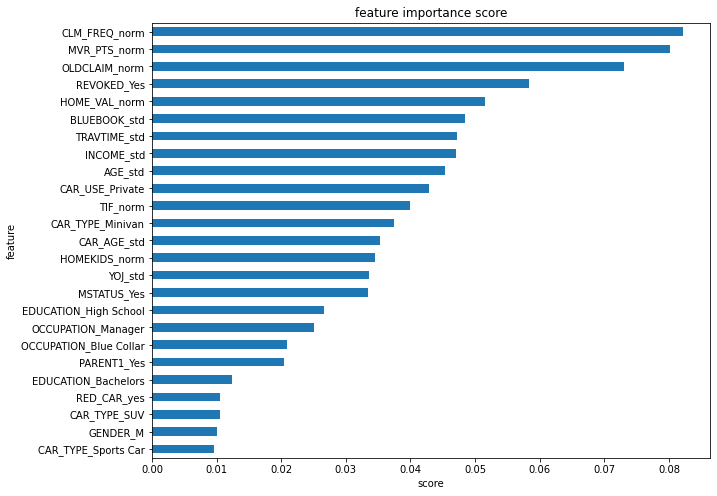

In [ ]:
show_feature_importance(rf)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

#List Hyperparameters yang akan diuji
hyperparameters = dict(
                       n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah subtree --
                       bootstrap = [True], # Apakah pakai bootstrapping atau tidak
                       criterion = ['gini','entropy'],
                       max_depth = [int(x) for x in np.linspace(1, 10, num = 11)],  # Maximum kedalaman tree
                       min_samples_split = [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)], # Jumlah minimum samples pada node agar boleh di split menjadi leaf baru
                       min_samples_leaf = [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)], # Jumlah minimum samples pada leaf agar boleh terbentuk leaf baru
                       max_features = ['auto', 'sqrt', 'log2'], # Jumlah feature yg dipertimbangkan pada masing-masing split
                       n_jobs = [-1], # Core untuk parallel computation. -1 untuk menggunakan semua core
                      )

# Init
rf = RandomForestClassifier(random_state=42)
rf_tuned = RandomizedSearchCV(rf, hyperparameters, cv=5, random_state=42, scoring='f1')
rf_tuned.fit(X1_over_SMOTE,y1_over_SMOTE)

# Predict & Evaluation
y1_pred = rf_tuned.predict(X1_test)#Check performa dari model
eval_classification(rf_tuned, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.76
Precision (Test Set): 0.53
Recall (Test Set): 0.55
F1-Score (Test Set): 0.54
AUC: 0.69


In [ ]:
show_best_hyperparameter(rf_tuned.best_estimator_, hyperparameters)

Best n_estimators: 400
Best bootstrap: True
Best criterion: gini
Best max_depth: 10
Best min_samples_split: 4
Best min_samples_leaf: 1
Best max_features: log2
Best n_jobs: -1


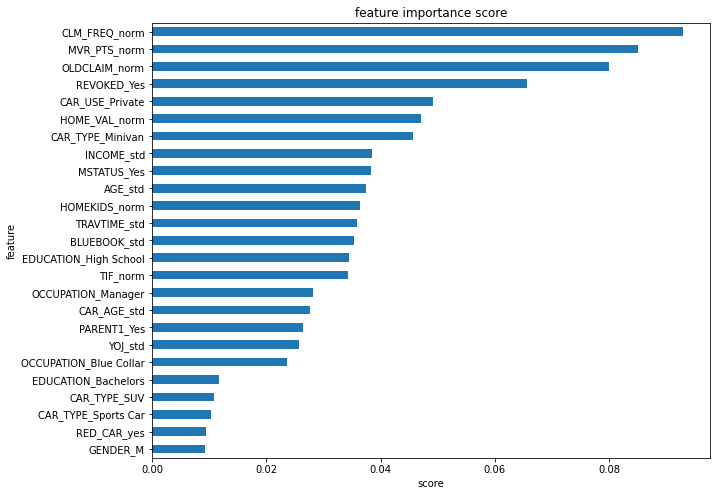

In [ ]:
show_feature_importance(rf_tuned.best_estimator_)

#####Boosting: AdaBoost

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
ab = AdaBoostClassifier(random_state=42)
ab.fit(X1_over_SMOTE,y1_over_SMOTE)

y1_pred = ab.predict(X1_test)
eval_classification(ab, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.52
Recall (Test Set): 0.57
F1-Score (Test Set): 0.55
AUC: 0.69


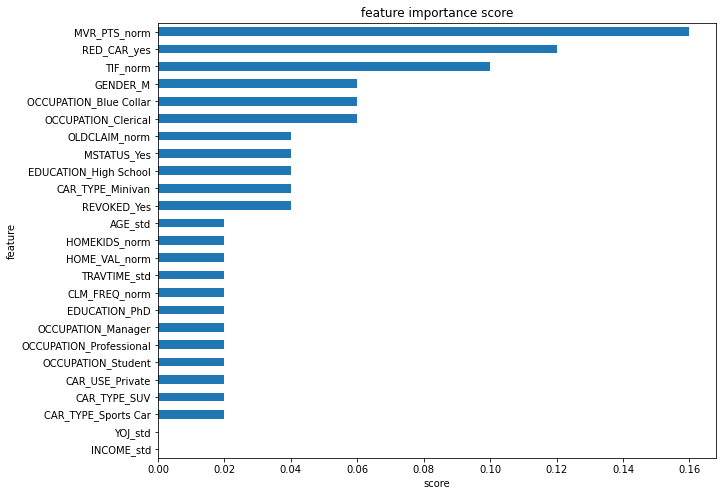

In [ ]:
show_feature_importance(ab)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

# List of hyperparameter
hyperparameters = dict(n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)], # Jumlah iterasi
                       learning_rate = [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],  
                       algorithm = ['SAMME', 'SAMME.R']
                      )

# Init model
ab = AdaBoostClassifier(random_state=42)
ab_tuned = RandomizedSearchCV(ab, hyperparameters, random_state=42, cv=5, scoring='f1')
ab_tuned.fit(X1_over_SMOTE,y1_over_SMOTE)

# Predict & Evaluation
y1_pred = ab_tuned.predict(X1_test)#Check performa dari model
eval_classification(ab_tuned, y1_pred, X1_over_SMOTE, y1_over_SMOTE, X1_test, y1_test)

Accuracy (Test Set): 0.75
Precision (Test Set): 0.51
Recall (Test Set): 0.59
F1-Score (Test Set): 0.55
AUC: 0.70


In [ ]:
show_best_hyperparameter(ab_tuned.best_estimator_, hyperparameters)

Best n_estimators: 800
Best learning_rate: 0.06873684210526315
Best algorithm: SAMME.R


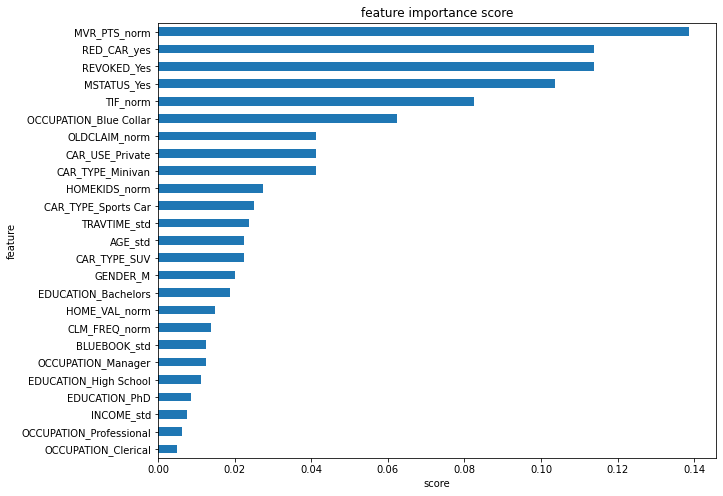

In [ ]:
show_feature_importance(ab_tuned.best_estimator_)

#####Boosting: XGBoost

In [ ]:
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg.fit(X1_over_SMOTE, y1_over_SMOTE)

y1_pred = xg.predict(array_X1_test)
eval_classification(xg, y1_pred, X1_over_SMOTE, y1_over_SMOTE, array_X1_test, array_y1_test)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.59
Recall (Test Set): 0.48
F1-Score (Test Set): 0.53
AUC: 0.68


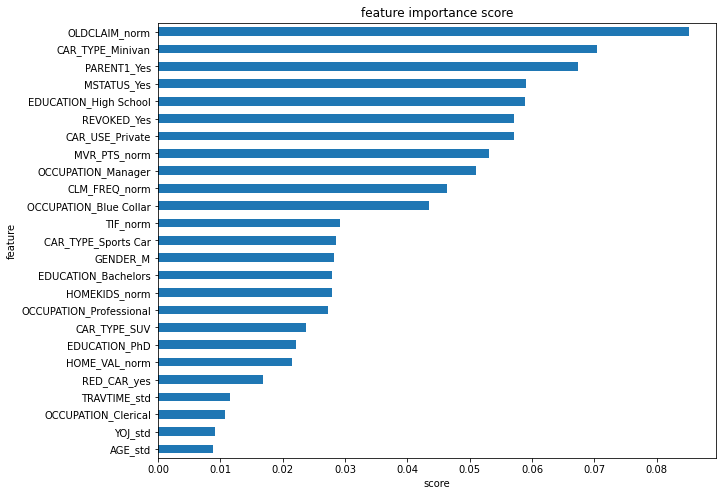

In [ ]:
show_feature_importance(xg)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(1, 10, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, cv=5, random_state=42, scoring='f1')
xg_tuned.fit(X1_over_SMOTE,y1_over_SMOTE)

# Predict & Evaluation
y1_pred = xg_tuned.predict(array_X1_test)#Check performa dari model
eval_classification(xg_tuned, y1_pred, X1_over_SMOTE, y1_over_SMOTE, array_X1_test, array_y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.59
Recall (Test Set): 0.41
F1-Score (Test Set): 0.48
AUC: 0.65


In [ ]:
show_best_hyperparameter(xg_tuned.best_estimator_, hyperparameters)

Best max_depth: 10
Best min_child_weight: 2
Best gamma: 0.5
Best tree_method: hist
Best colsample_bytree: 1.0
Best eta: 0.7777777777777778
Best lambda: 0.2
Best alpha: 0.1


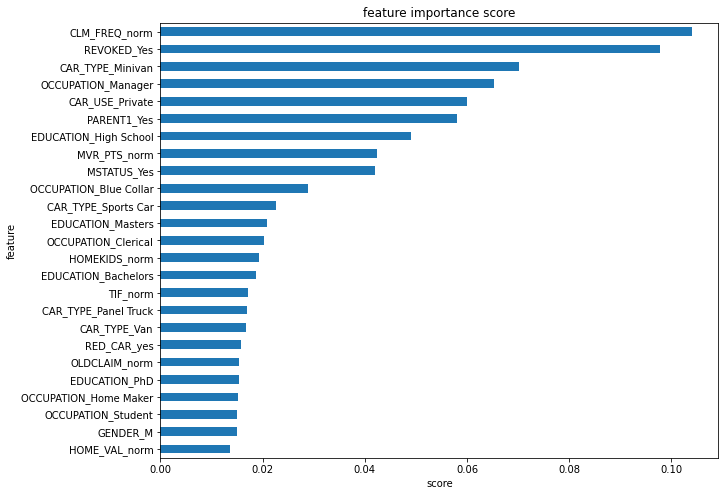

In [ ]:
show_feature_importance(xg_tuned.best_estimator_)

#####Choosing the baseline

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, roc_auc_score
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier

def algorithm_pipeline(X1_over_SMOTE, array_X1_test, y1_over_SMOTE, array_y1_test, model, hyperparameters, cv=5, scoring_fit='f1', scoring_test=f1_score): #
    rs = RandomizedSearchCV(estimator=model, param_distributions=hyperparameters, cv=cv, n_jobs=-1, scoring=scoring_fit, verbose=0, random_state=42) # Use GridSearch better if you have more resource & time
    rs.fit(X1_over_SMOTE, y1_over_SMOTE)
    best_model = rs.best_estimator_
    
    pred = rs.predict(array_X1_test)
    score = scoring_test(array_y1_test, pred)
    return [best_model, pred, score]

In [ ]:
models_to_train = [LogisticRegression(), KNeighborsClassifier(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(random_state=42), XGBClassifier(random_state=42)]

# Defining the hyperparameters to optimize
grid_parameters = [
    { # Logistic Regression
        'penalty': ['l2','l1','elasticnet'],
        'C': np.logspace(-4,4,20)
    },
    { # KNearestNeighbor
        'leaf_size': list(range(1,50)),
        'n_neighbors': list(range(1,30)),
        'p': [1,2],
        'algorithm' : ['auto', 'ball_tree', 'kd_tree', 'brute']
    }, 
    { # Decision Tree
        'max_depth': np.linspace(1, 32, 32, endpoint=True),
        'min_samples_split': np.linspace(0.1, 1.0, 10, endpoint=True),
        'min_samples_leaf': np.linspace(0.1, 0.5, 5, endpoint=True),
        'max_features': list(range(1,array_X1_test.shape[1]))
    }, 
    { # Random Forest
        'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
        'max_features': ['auto', 'sqrt', 'log2'],
        'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)],
        'criterion': ['gini','entropy'],
        'min_samples_split': [int(x) for x in np.linspace(start = 2, stop = 10, num = 5)],
        'min_samples_leaf': [int(x) for x in np.linspace(start = 1, stop = 10, num = 5)],
        'bootstrap': [True],
        'n_jobs': [-1]
    },
    { # Adaboost
       'n_estimators': [int(x) for x in np.linspace(start = 100, stop = 2000, num = 20)],
       'learning_rate': [float(x) for x in np.linspace(start = 0.001, stop = 0.1, num = 20)],
       'algorithm': ['SAMME', 'SAMME.R']
    },
    { # XGBoost
        'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
        'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
        'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'tree_method' : ['auto', 'exact', 'approx', 'hist'],

        'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

        'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
        'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)]
    }
]

In [ ]:
models_preds_scores = []

for i, model in enumerate(models_to_train):
    hyperparameters = grid_parameters[i]
    result = algorithm_pipeline(X1_over_SMOTE, array_X1_test, y1_over_SMOTE, array_y1_test,  model, hyperparameters, cv=5)
    models_preds_scores.append(result)

In [ ]:
for result in models_preds_scores:
    print('Model: {0}, Score: {1}'.format(type(result[0]).__name__, result[2])) # score in training data

Model: LogisticRegression, Score: 0.5502901353965184
Model: KNeighborsClassifier, Score: 0.3220858895705522
Model: DecisionTreeClassifier, Score: 0.46760837798343885
Model: RandomForestClassifier, Score: 0.5053533190578159
Model: AdaBoostClassifier, Score: 0.547441058079356
Model: XGBClassifier, Score: 0.47154471544715443


In [ ]:
models_preds_scores

[[LogisticRegression(C=11.288378916846883, class_weight=None, dual=False,
                     fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                     max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                     random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                     warm_start=False),
  array([1., 1., 0., ..., 0., 1., 1.]),
  0.5502901353965184],
 [KNeighborsClassifier(algorithm='auto', leaf_size=9, metric='minkowski',
                       metric_params=None, n_jobs=None, n_neighbors=2, p=1,
                       weights='uniform'),
  array([0., 1., 0., ..., 0., 1., 0.]),
  0.3220858895705522],
 [DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                         max_depth=10.0, max_features=23, max_leaf_nodes=None,
                         min_impurity_decrease=0.0, min_impurity_split=None,
                         min_samples_leaf=0.1, min_samples_split=0.1,
                         m

Stacking

In [ ]:
# define level-1 algorithm
level1 = list()
level1.append(('lr', LogisticRegression(C=4.281332398719396)))
level1.append(('knn', KNeighborsClassifier(algorithm='brute', leaf_size=48, n_neighbors=17, p=1)))
level1.append(('dt', DecisionTreeClassifier(max_depth=31.0, max_features=25, min_samples_leaf=0.4, min_samples_split=0.30000000000000004)))
level1.append(('rf', RandomForestClassifier(max_depth=110, max_features='sqrt', min_samples_leaf=5, min_samples_split=10, n_estimators=1600, n_jobs=-1)))
level1.append(('ab', AdaBoostClassifier(learning_rate=0.05831578947368421, n_estimators=200, random_state=42)))

# define level-2 algorithm
level2 = XGBClassifier(alpha=0.30000000000000004, base_score=0.5, booster='gbtree',
                colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.1,
                eta=0.13131313131313133, gamma=0.4, gpu_id=0,
                importance_type='gain',
                learning_rate=0.13131313, max_delta_step=0, max_depth=90,
                min_child_weight=6,
                n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=42,
                reg_alpha=0.300000012, reg_lambda=0, scale_pos_weight=1,
                subsample=1, tree_method='hist', validate_parameters=1,
                verbosity=0)

# Fit model
stacking_model = StackingClassifier(estimators=level1, final_estimator=level2, cv=5)
stacking_model.fit(X1_over_SMOTE, y1_over_SMOTE)
y1_pred = stacking_model.predict(array_X1_test)#Check performa dari model
eval_classification(stacking_model, y1_pred, X1_over_SMOTE, array_X1_test, y1_over_SMOTE, array_y1_test)

Accuracy (Test Set): 0.77
Precision (Test Set): 0.62
Recall (Test Set): 0.28
F1-Score (Test Set): 0.39
AUC: 0.61
